# Creating a barrier book in python

In [1]:
import math
from scipy.stats.distributions import norm
import matplotlib.pyplot as plt

In [19]:
error = True
message = "This input is incorrect. Please enter p for put or c for call"
while error:
    error = False
    putCall = raw_input("Do you want to price a put(p) or a call(c) option? " )
    if putCall == 'p':
        phi = -1
    elif putCall == 'c':
        phi = 1
    else:
        print message
        error = True

Do you want to price a put(p) or a call(c) option? c


In [20]:
S =input("Please enter the current Stock price- ")
X = input("Please enter the strike price of the option- ")
T= input("Please enter the time to maturity(in days)- ")
T = float(T)/365

Please enter the current Stock price- 127.62
Please enter the strike price of the option- 130
Please enter the time to maturity(in days)- 369


In [21]:
sigma = input("Please enter the volatility of the underlying asset- ")
b = input("Please enter the carry rate- ")
r = input("Please enter the yearly interest rate- ")
r = r

Please enter the volatility of the underlying asset- 0.2
Please enter the carry rate- 0.0163
Please enter the yearly interest rate- 0.001


In [22]:
H = input("Please enter the barrier height- " )

Please enter the barrier height- 131


In [23]:
K = input("How high is the rebate you receive if you get knocked out?- ")

How high is the rebate you receive if you get knocked out?- 0


In [24]:
message3 ="Please enter out or in."
error3 = True
while error3:
    inOut = raw_input("Please type whether it is an out or an in barrier.(out/in)- ")
    if inOut == 'out'or inOut == 'in':
        error3 = False
    else:
        print message3

Please type whether it is an out or an in barrier.(out/in)- in


In [25]:
X = float(X)
b = float(b)
H = float(H)
K = float(K)
S = float(S)

In [26]:
####Function for evaluating the option price given the underlying price

In [27]:
def price_option(S):
    if putCall == 'c':
        phi = 1
    else:
        phi = -1
    if S>H:
        eta = 1
    else:
        eta = -1
    sigma2 = sigma**2
    mu = (b-(sigma2 / 2))/sigma2
    landa = math.sqrt(mu**2.0 + (2*r)/(sigma2))
    x1 = (math.log(S/X)) / (sigma*math.sqrt(T)) + (1+mu)*sigma*math.sqrt(T)
    x2 = (math.log(S/H)) / (sigma*math.sqrt(T)) + (1+mu)*sigma*math.sqrt(T)
    y1 = math.log((H**2)/(S*X)) / (sigma*math.sqrt(T)) + (1+mu)*sigma*math.sqrt(T)
    y2 = math.log(H/S) / (sigma*math.sqrt(T)) + (1+mu)*sigma*math.sqrt(T)
    z = math.log(H/S) / (sigma*math.sqrt(T)) + landa*sigma*math.sqrt(T)
    n1=phi*x1-phi*sigma*math.sqrt(T)
    A= phi * S*math.exp(b-r)*norm.cdf(phi*x1,0,1) - phi*X*math.exp(-r*T)*norm.cdf(n1,0,1)
    n2=phi*x2-phi*sigma*math.sqrt(T)
    B= phi * S*math.exp(b-r)*norm.cdf(phi*x2,0,1) - phi*X*math.exp(-r*T)*norm.cdf(n2,0,1)
    n3=eta*y1
    n4=eta*y1-eta*sigma*math.sqrt(T)
    C= phi * S*math.exp(b-r)*(H/S)**(2*(mu+1))*norm.cdf(n3,0,1) - phi*X*math.exp(-r*T)*(H/S)
    n5=eta*y2
    n6=eta*y2-eta*sigma*math.sqrt(T)
    D= phi * S*math.exp(b-r)*(H/S)**(2*(mu+1))*norm.cdf(n5,0,1) - phi*X*math.exp(-r*T)*(H/S)
    n9 = norm.cdf(eta*x2 - eta*sigma*math.sqrt(T),0,1)
    n10 = norm.cdf(eta*y2 - eta*sigma*math.sqrt(T),0,1)
    E = K*math.exp(-r*T)*(n9 - (H/S)**(2*mu)*n10)
    n11 = norm.cdf(z*eta, 0,1)
    n12 = norm.cdf(eta*z-2*eta*landa*sigma*math.sqrt(T),0,1)
    F = K*math.exp(-r*T)*((H/S)**(mu+landa)*(n11)-(H/S)**(mu-landa)*n12)
    
    if putCall == 'p':
        if X < H:
            if S > H:
                if inOut == 'in':
                    price = A + E
                elif inOut == 'out':
                    price = F
            else:
                if inOut == 'in':
                    price = C + E
                elif inOut == 'out':
                    price = A - C + F
        else:
            if S > H:
                if inOut == 'in':
                    price = B - C + D + E
                elif inOut == 'out':
                    price = A - B + C - D + F
            else:
                if inOut == 'in':
                    price = A - B + D + E
                elif inOut == 'out':
                    price = B - D + F
    else:
        if X < H:
            if S > H:
                if inOut == 'in':
                    price = A - B + D + E
                elif inOut == 'out':
                    price = B - D + F
            else:
                if inOut == 'in':
                    price = B - C + D + E
                elif inOut == 'out':
                    price = A - B + C - D + F
        else:
            if S > H:
                if inOut == 'in':
                    price = C + E
                elif inOut == 'out':
                    price = A - C + F
            else:
                if inOut == 'in':
                    price = A + E
                elif inOut == 'out':
                    price = F
    if price < 0:
        price = 0
    return price

In [28]:
##Underlying price
print price_option(S)
S=int(S)
u_price = range(S-25, S+50)
##Option price
op_price = []
for i in range(len(u_price)):
    op_price.append(price_option(u_price[i]))
print u_price
print op_price

12.1979099893
[102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176]
[2.3860216258910611, 2.6017305202541365, 2.8301723965987833, 3.0715784093296179, 3.3261565672623306, 3.5940916749043197, 3.8755454267892446, 4.1706566424427081, 4.479541628750269, 4.8022946559979971, 5.1389885336265024, 5.4896752717677373, 5.8543868148836964, 6.2331358342762684, 6.6259165668466977, 7.0327056882344863, 7.4534632093172064, 7.8881333859845455, 8.3366456330844585, 8.7989154344456324, 9.2748452419006071, 9.7643253572319821, 10.267234791938364, 10.783442100644507, 11.312806184854054, 11.855177064552791, 12.410396615913058, 12.978299274016507, 13.558712700103854, 14.151458413378606, 0, 0, 0, 0

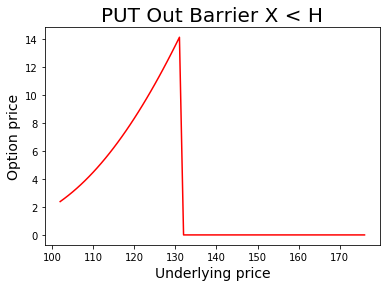

In [29]:
#Plotting the underlying price vs. the option price
plt.plot(u_price, op_price, color='red')
plt.xlabel('Underlying price', fontsize=14)
plt.ylabel('Option price',fontsize=14)
plt.title('PUT Out Barrier X < H', fontsize=20)
plt.show()

In [32]:
import QuantLib as ql # version 1.5
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
# option data
maturity_date = ql.Date(15, 1, 2016)
spot_price = 127.62
strike_price = 130
volatility = 0.20 # the historical vols for a year
dividend_rate =  0.0163
option_type = ql.Option.Call

risk_free_rate = 0.001
day_count = ql.Actual365Fixed()
calendar = ql.UnitedStates()

calculation_date = ql.Date(8, 5, 2015)
ql.Settings.instance().evaluationDate = calculation_date

In [34]:
# construct the European Option
payoff = ql.PlainVanillaPayoff(option_type, strike_price)
exercise = ql.EuropeanExercise(maturity_date)
european_option = ql.VanillaOption(payoff, exercise)

In [53]:
spot_handle = ql.QuoteHandle(ql.SimpleQuote(spot_price))
flat_ts = ql.YieldTermStructureHandle(ql.FlatForward(calculation_date, risk_free_rate, day_count))
dividend_yield = ql.YieldTermStructureHandle(ql.FlatForward(calculation_date, dividend_rate, day_count))
flat_vol_ts = ql.BlackVolTermStructureHandle(ql.BlackConstantVol(calculation_date, calendar, volatility, day_count))
bsm_process = ql.BlackProcess(spot_handle,flat_ts,flat_vol_ts)

In [54]:
european_option.setPricingEngine(ql.AnalyticEuropeanEngine(bsm_process))
bs_price = european_option.NPV()
print "The theoretical price is ", bs_price

The theoretical price is  7.38734748882


In [55]:
def binomial_price(bsm_process, steps):
    binomial_engine = ql.BinomialVanillaEngine(bsm_process, "crr", steps)
    european_option.setPricingEngine(binomial_engine)
    return european_option.NPV()

steps = range(2, 100, 1)
prices = [binomial_price(bsm_process, step) for step in steps]

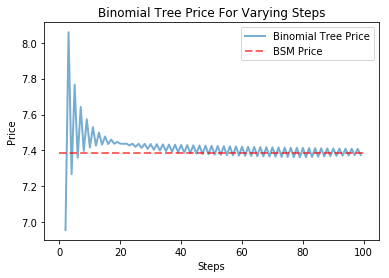

In [56]:
plt.plot(steps, prices, label="Binomial Tree Price", lw=2, alpha=0.6)
plt.plot([0,100],[bs_price, bs_price], "r--", label="BSM Price", lw=2, alpha=0.6)
plt.xlabel("Steps")
plt.ylabel("Price")
plt.title("Binomial Tree Price For Varying Steps")
plt.legend()

# Monte carlo

In [57]:
engine = ql.MCEuropeanEngine(bsm_process, "PseudoRandom",timeSteps=20,requiredSamples=250000)
european_option.setPricingEngine(engine)

In [58]:
european_option.NPV()

7.407117247292182

In [59]:
print european_option.delta()
print european_option.gamma()
print european_option.vega()

RuntimeError: delta not provided

# Finite Difference

In [60]:
engine = ql.FDEuropeanEngine(bsm_process,801,801)
european_option.setPricingEngine(engine)

In [61]:
european_option.NPV()

7.387251162785308

In [62]:
print european_option.delta()
print european_option.gamma()

0.488456890685
0.0187906031794


# Creating a barrier